# Visualization for the distill-before-verify experiment with acas_xu

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import seaborn as sns
import os
import numpy as np

## Load Statistics from Experiment Folders

In [2]:

experiment = "../../output_data/distill_before_verify_experiment/exp_summit_depth_11_06_2022"
depth_results = pd.read_csv(f"{experiment}/results.csv")
depth_results_teacher = pd.read_csv(f"{experiment}/results.teacher.csv")

experiment = "../../output_data/distill_before_verify_experiment/exp_summit_ndata_11_06_2022"
ndata_results = pd.read_csv(f"./{experiment}/results.csv")
ndata_results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

In [3]:
depth_results.columns

Index(['num_hidden_layers', 'hidden_layer_width', 'repetition',
       'n_synthetic_data_points', 'synthetic_data_sampling', 'tau', 'a_prev',
       'uuid', 'seed', 'loss', 'sparse_categorical_accuracy', 'val_loss',
       'val_sparse_categorical_accuracy', 'distill_time',
       'trainable_parameters', 'prop.1.result', 'prop.1.python_time',
       'prop.1.reported_runtime', 'prop.1.stdout_result', 'prop.2.result',
       'prop.2.python_time', 'prop.2.reported_runtime', 'prop.2.stdout_result',
       'prop.3.result', 'prop.3.python_time', 'prop.3.reported_runtime',
       'prop.3.stdout_result', 'prop.4.result', 'prop.4.python_time',
       'prop.4.reported_runtime', 'prop.4.stdout_result', 'prop.5.result',
       'prop.5.python_time', 'prop.5.reported_runtime', 'prop.5.stdout_result',
       'prop.6.result', 'prop.6.python_time', 'prop.6.reported_runtime',
       'prop.6.stdout_result', 'prop.7.result', 'prop.7.python_time',
       'prop.7.reported_runtime', 'prop.7.stdout_result', 'p

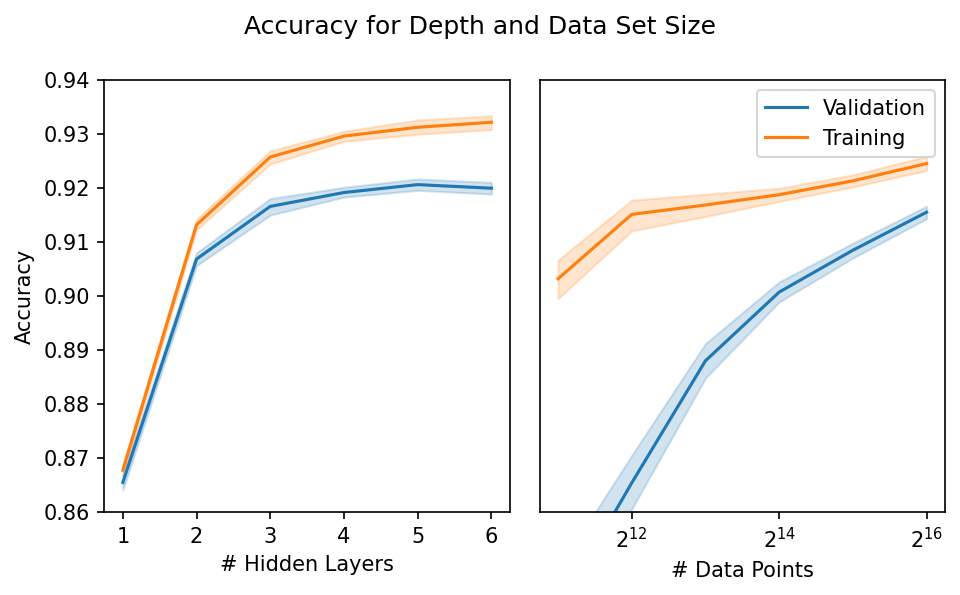

In [4]:
plt.figure(figsize=(6.5,4), dpi=150, tight_layout=True)
plt.subplot(1,2,1)
df = depth_results.melt(
        id_vars="num_hidden_layers",
        value_vars=("val_sparse_categorical_accuracy", "sparse_categorical_accuracy"))
#df["value"] = 1/(1-df["value"])
g = sns.lineplot(
    data=df,
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.xlabel("# Hidden Layers")
plt.ylabel("Accuracy")
g.set_ylim(0.86, 0.94)
#g.set_xscale("log", base=2)
#plt.title("Depth vs Accuracy")
plt.gca().legend().set_visible(False)

plt.subplot(1,2,2)
df = ndata_results.rename({
            "val_sparse_categorical_accuracy":"Validation",
            "sparse_categorical_accuracy":"Training",
        }, axis=1).melt(
            id_vars="n_synthetic_data_points",
            value_vars=("Validation", "Training")
        )
#df["value"] = 1-df["value"]
g = sns.lineplot(
    data=df,
    x="n_synthetic_data_points",
    y="value",
    hue="variable")
    #err_style="bars")
plt.xlabel("# Data Points")
plt.ylabel("Accuracy")
plt.gca().get_yaxis().set_visible(False)
g.get_legend().set_title(None)
g.set_xscale("log", base=2)
g.set_ylim(0.86, 0.94)
#plt.title("# Data Points vs Accuracy")

plt.suptitle("Accuracy for Depth and Data Set Size")
plt.savefig("acasxu_experiment_accuracy_plot.pdf")

In [5]:
columns = [f'prop.{p}.reported_runtime' for p in range(1,11)]
filtered_depth_results = depth_results.melt(
        id_vars="num_hidden_layers",
        value_vars=columns)
filtered_depth_results["value"] = filtered_depth_results["value"].where(filtered_depth_results["value"]!="SafeBeforeEnumerate", 0.0)
filtered_depth_results["value"] = filtered_depth_results["value"].astype("float32")

columns = [f'prop.{p}.reported_runtime' for p in range(1,11)]
filtered_ndata_results = ndata_results.melt(
        id_vars="n_synthetic_data_points",
        value_vars=columns)
filtered_ndata_results["value"] = filtered_depth_results["value"].where(filtered_depth_results["value"]!="SafeBeforeEnumerate", 0.0)
filtered_ndata_results["value"] = filtered_depth_results["value"].astype("float32")


plt.figure(figsize=(6.5,4), dpi=150, tight_layout=True)
plt.subplot(1,2,1)
g = sns.lineplot(
    data=filtered_depth_results,
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Average Runtime (Sec)")
plt.xlabel("# Hidden Layers")
#plt.ylim(0,3)
g.set_yscale("log", base=10)
g.set_ylim(0.003,3)
plt.gca().legend().set_visible(False)
#plt.title("Time to Verify for Various Depths")
#plt.savefig("viz_10_17_2022/time_for_depth.pdf")

plt.subplot(1,2,2)
df = filtered_ndata_results
df["variable"] = df["variable"].str.extract(r"(\d+)")
g = sns.lineplot(
    data=filtered_ndata_results,
    x="n_synthetic_data_points",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Average Runtime (Sec)")
plt.xlabel("# Data Points")
#plt.title("Time to Verify for # Synthetic Data Points")
g.set_xscale("log", base=2)
g.set_yscale("log", base=10)
g.set_ylim(0.003,3)
plt.gca().get_yaxis().set_visible(False)
plt.suptitle("Time to Verify for Depth and Data Set Size")
sns.move_legend(g, "center left", bbox_to_anchor=(1, .5), title='Property')

plt.savefig("acasxu_experiment_timetoverify_plot.pdf")
plt.show()

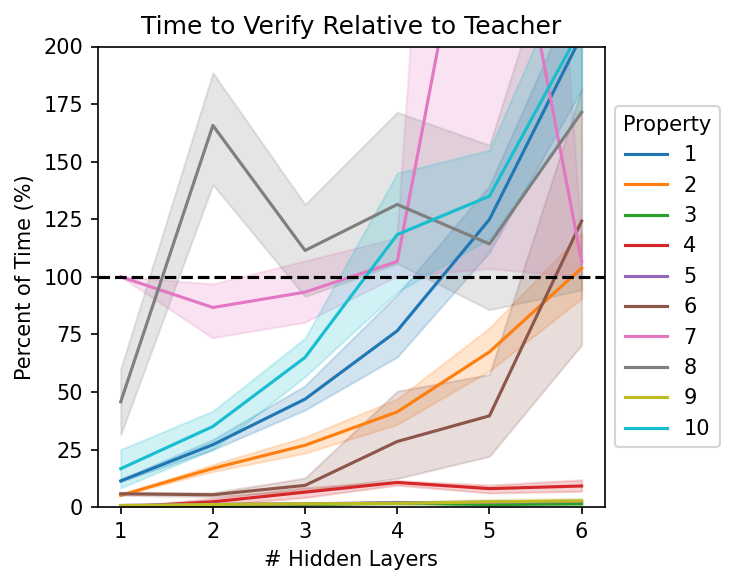

In [ ]:
columns = [f'prop.{p}.reported_runtime' for p in range(1,11)]
filtered_depth_results = depth_results.melt(
        id_vars="num_hidden_layers",
        value_vars=columns)
filtered_depth_results["value"] = filtered_depth_results["value"].where(filtered_depth_results["value"]!="SafeBeforeEnumerate", 0.0)
filtered_depth_results["value"] = filtered_depth_results["value"].astype("float32")

filtered_depth_results_teacher = depth_results_teacher.melt(
        #id_vars="num_hidden_layers",
        value_vars=columns)
filtered_depth_results_teacher["value"] = filtered_depth_results_teacher["value"].where(filtered_depth_results_teacher["value"]!="SafeBeforeEnumerate", 0.0)
filtered_depth_results_teacher["value"] = filtered_depth_results_teacher["value"].astype("float32")
filtered_depth_results_teacher = filtered_depth_results_teacher.groupby("variable").mean()

filtered_depth_results_teacher
filtered_depth_results = pd.merge(filtered_depth_results, filtered_depth_results_teacher, how="left", on="variable", suffixes=('','_teacher'))
filtered_depth_results["value"] = filtered_depth_results["value"] / filtered_depth_results["value_teacher"] * 100

filtered_depth_results["variable"] = filtered_depth_results["variable"].str.extract(r"(\d+)")

plt.figure(figsize=(5,4), dpi=150, tight_layout=True)
g = sns.lineplot(
    data=filtered_depth_results,
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Percent of Time (%)")
plt.xlabel("# Hidden Layers")
#plt.ylim(0,3)
g.set_ylim(0, 200)
plt.title("Time to Verify Relative to Teacher")

plt.axhline(100, linestyle="--", c="black")

sns.move_legend(g, "center left", bbox_to_anchor=(1, .5), title='Property')

plt.savefig("acasxu_experiment_timetoverify_relative.pdf")
plt.show()


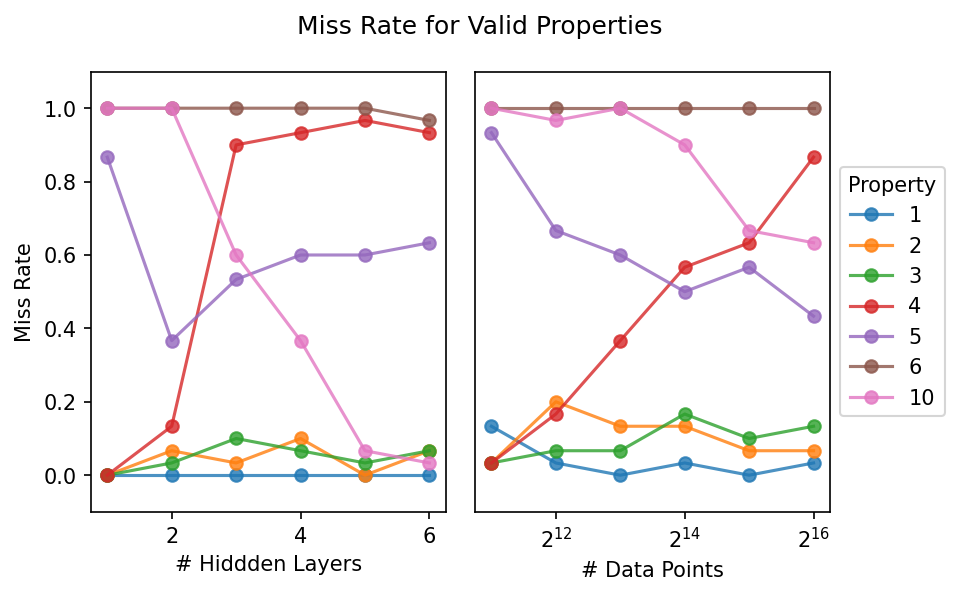

In [ ]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

plt.figure(figsize=(6.5,4), dpi=150, tight_layout=True)
plt.subplot(1,2,1)

for property in range(1,11):
    # print(f"Property {property}")
    # print("Teacher Network")
    # print(depth_results_teacher[f'prop.{property}.result'].value_counts())

    count_results = depth_results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    # print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    # print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    # print(f"Property {property}")
    # print("Student Network")
    # print(depth_results[f'prop.{property}.result'].value_counts())

    count_results = depth_results.groupby("num_hidden_layers")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    if depth_results_teacher[f'prop.{property}.result'][0]=="holds":
        plt.plot(student_miss_rate, label=f"{property}", marker="o", alpha=0.8)

plt.ylabel("Miss Rate")
plt.gca().set_ylim(-0.1,1.1)
plt.xlabel("# Hiddden Layers")
#plt.title("Miss Rate for Properties by Depth")


plt.subplot(1,2,2)
for property in range(1,11):
    # print(f"Property {property}")
    # print("Teacher Network")
    # print(ndata_results_teacher[f'prop.{property}.result'].value_counts())

    count_results = ndata_results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    # print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    # print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    # print(f"Property {property}")
    # print("Student Network")
    # print(ndata_results[f'prop.{property}.result'].value_counts())

    count_results = ndata_results.groupby("n_synthetic_data_points")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    if ndata_results_teacher[f'prop.{property}.result'][0]=="holds":
        plt.plot(student_miss_rate, label=f"{property}", marker="o", alpha=0.8)

    plt.xscale("log", base=2)

plt.legend(loc="center left", bbox_to_anchor=(1, .5), title='Property')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_ylim(-0.1,1.1)
plt.ylabel("Miss Rate")
plt.xlabel("# Data Points")
#plt.title("Miss Rate for Properties by # Data Points")

plt.suptitle("Miss Rate for Valid Properties")

plt.savefig("acasxu_experiment_property_miss_rate.pdf")
plt.show()


